In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('bmh')

In [47]:
df = pd.read_csv('post_clean_data.csv')
df['date'] = pd.to_datetime(df['date'])

In [48]:
df.head()

,title,date,car_year,car_make,car_model,review_lenght,words_count,comfort,power,problem,quiet,speed,noise,great,review_polarity,review_subjectivity,pol_class
0,2007_acura_mdx,2009-07-31,2007,acura,mdx,686,134,1,1,0,0,0,0,0,0.232000,0.615000,positive
1,2007_acura_mdx,2009-07-30,2007,acura,mdx,393,71,0,0,0,0,0,0,0,0.070833,0.700000,positive
2,2007_acura_mdx,2009-06-22,2007,acura,mdx,480,84,0,1,1,0,0,0,1,0.527778,0.777778,positive
3,2007_acura_mdx,2009-04-13,2007,acura,mdx,568,100,1,1,0,0,0,0,0,0.028436,0.416082,positive
4,2007_acura_mdx,2009-04-06,2007,acura,mdx,398,79,1,0,1,0,0,0,1,0.270000,0.468182,positive


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41748 entries, 0 to 41747
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   title                41748 non-null  object        
 1   date                 41748 non-null  datetime64[ns]
 2   car_year             41748 non-null  int64         
 3   car_make             41748 non-null  object        
 4   car_model            41748 non-null  object        
 5   review_lenght        41748 non-null  int64         
 6   words_count          41748 non-null  int64         
 7   comfort              41748 non-null  int64         
 8   power                41748 non-null  int64         
 9   problem              41748 non-null  int64         
 10  quiet                41748 non-null  int64         
 11  speed                41748 non-null  int64         
 12  noise                41748 non-null  int64         
 13  great                41748 non-

In [50]:
df.describe().round(2)

,car_year,review_lenght,words_count,comfort,power,problem,quiet,speed,noise,great,review_polarity,review_subjectivity
count,41748.00,41748.00,41748.00,41748.00,41748.0,41748.00,41748.0,41748.0,41748.00,41748.00,41748.00,41748.00
mean,2007.74,466.52,88.42,0.25,0.2,0.13,0.1,0.1,0.06,0.36,0.25,0.53
std,0.76,184.78,35.02,0.43,0.4,0.34,0.3,0.3,0.24,0.48,0.18,0.12
min,2007.00,4.00,1.00,0.00,0.0,0.00,0.0,0.0,0.00,0.00,-1.00,0.00
25%,2007.00,313.00,60.00,0.00,0.0,0.00,0.0,0.0,0.00,0.00,0.14,0.46
50%,2008.00,479.00,91.00,0.00,0.0,0.00,0.0,0.0,0.00,0.00,0.25,0.53
75%,2008.00,653.00,121.00,0.00,0.0,0.00,0.0,0.0,0.00,1.00,0.35,0.60
max,2009.00,973.00,203.00,1.00,1.0,1.00,1.0,1.0,1.00,1.00,1.00,1.00


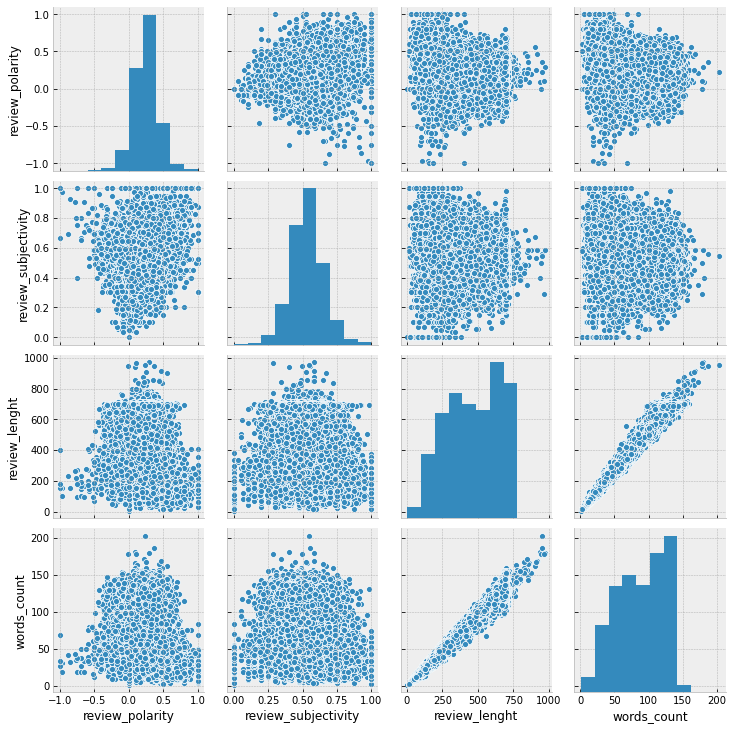

In [108]:
#Plotting a pair plot only with the numerical continous variables.Not including binary variables (0,1)
sns.pairplot(df[['review_polarity','review_subjectivity','review_lenght','words_count']])
plt.show()

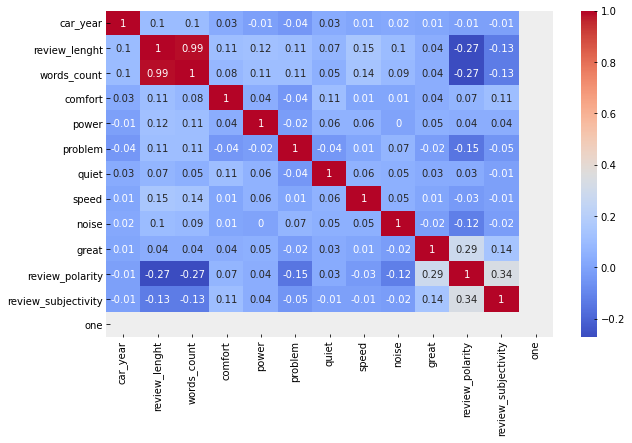

In [107]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr().round(2), annot=True, cmap='coolwarm')
plt.show()

Of course review lenght and word count are going to be highly correlated. Other than those there doesn't seem to be a lot of correlation between the variables.

<Figure size 720x576 with 0 Axes>

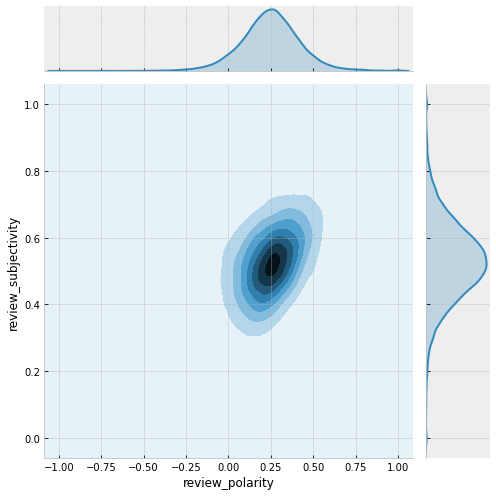

In [105]:
plt.figure(figsize=(10,8))
sns.jointplot(x='review_polarity', y='review_subjectivity', data=df, kind='kde', height=7)
plt.show()

In [54]:
#Create a subset of the data where each make has the same amount of observations
#df['car_make'].value_counts()
#150 seems like a good number, the least frequent has 183 observations
makes = list(df['car_make'].value_counts().index)
sdf = pd.DataFrame()
for c in makes:
    d = df.loc[df['car_make']==c].sample(180, random_state=88)
    sdf = sdf.append(d)    

<Figure size 720x576 with 0 Axes>

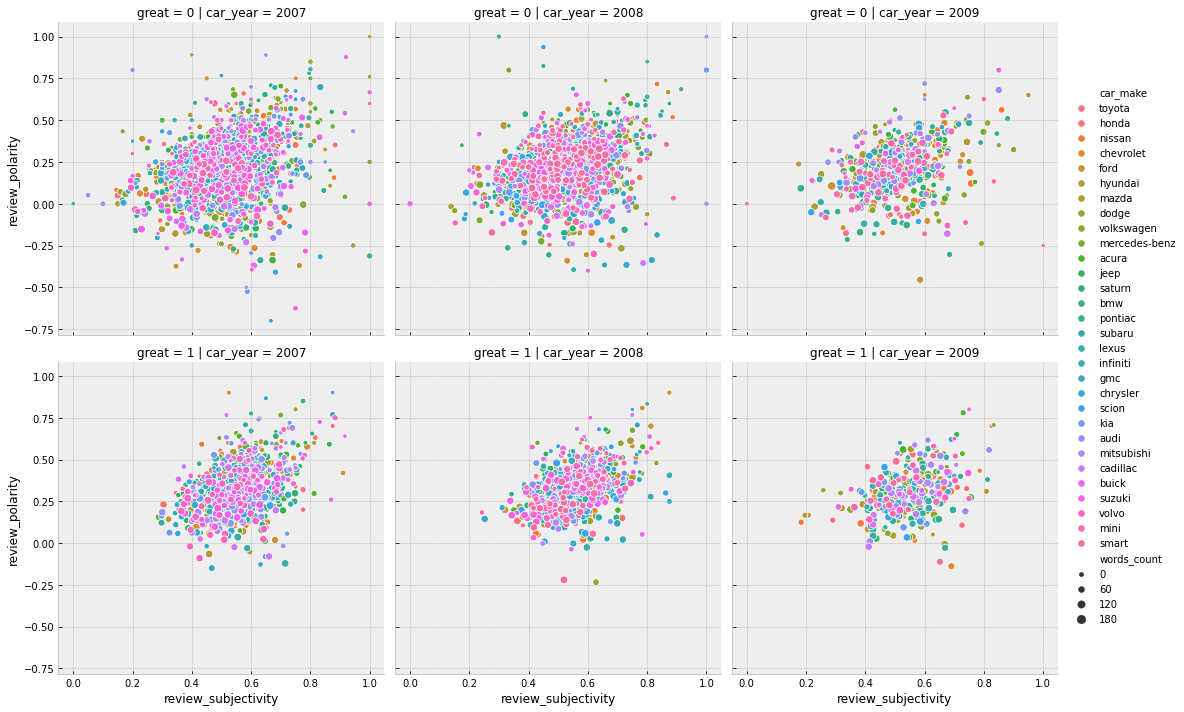

In [59]:
plt.figure(figsize=(10,8))
sns.relplot(x='review_subjectivity', y='review_polarity',data=sdf, hue='car_make',size='words_count', col='car_year',row= 'great',  x_jitter=True, y_jitter=True)
plt.show()

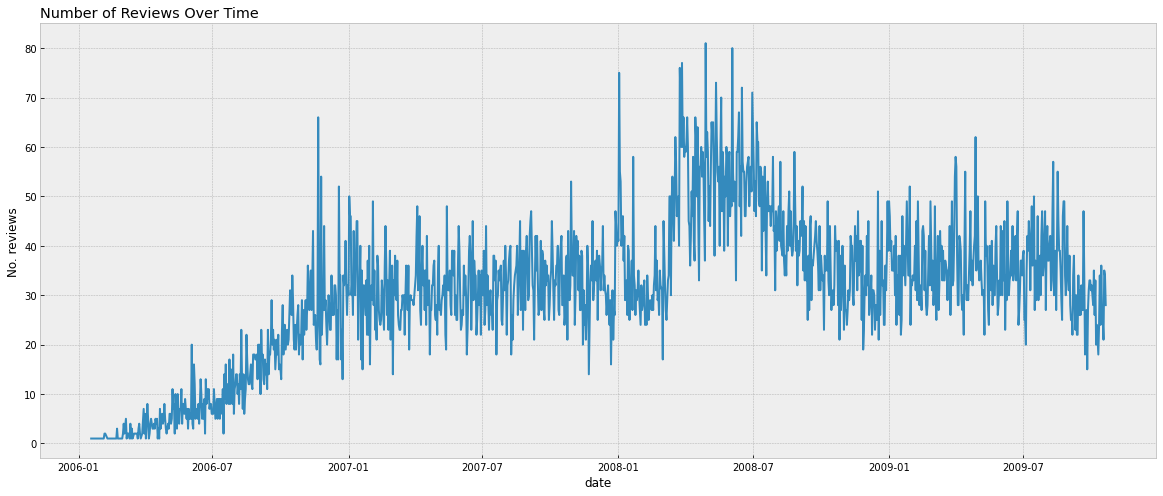

In [118]:
df['one'] = 1
plt.figure(figsize=(20,8))
sns.lineplot(x='date', y = 'one', data=df, estimator='sum', )
plt.title('Number of Reviews Over Time', loc='left')
plt.ylabel('No. reviews')
plt.show()

Most reviews peaked on the first semester of 2008.

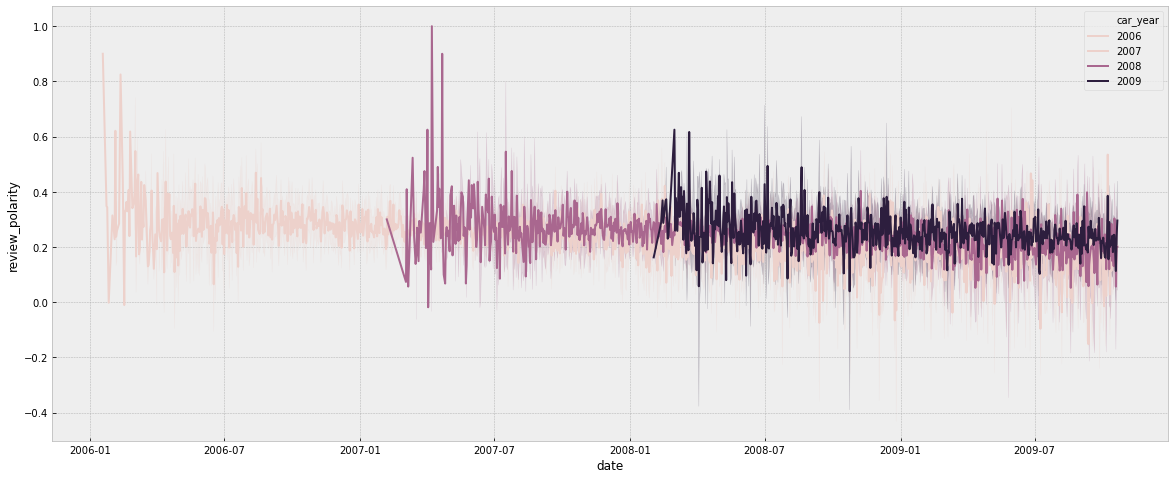

In [101]:
plt.figure(figsize=(20,8))
sns.lineplot(x='date', y = 'review_polarity', data=df, estimator='mean',hue='car_year')
# sns.relplot(x='date', y = 'review_polarity', data=df, kind='line')

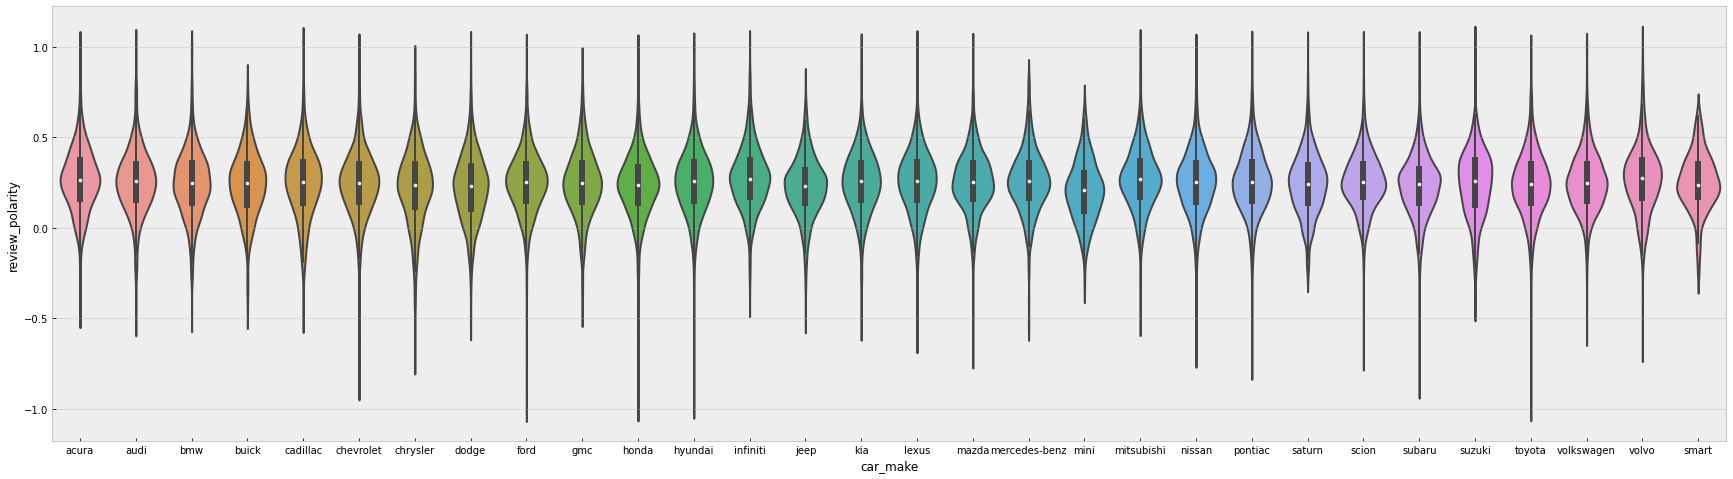

In [63]:
plt.figure(figsize=(30,8))
sns.violinplot(x='car_make',y='review_polarity',data=df)

The polarity seems normal accross all car brands. Let's check only negative polarity.

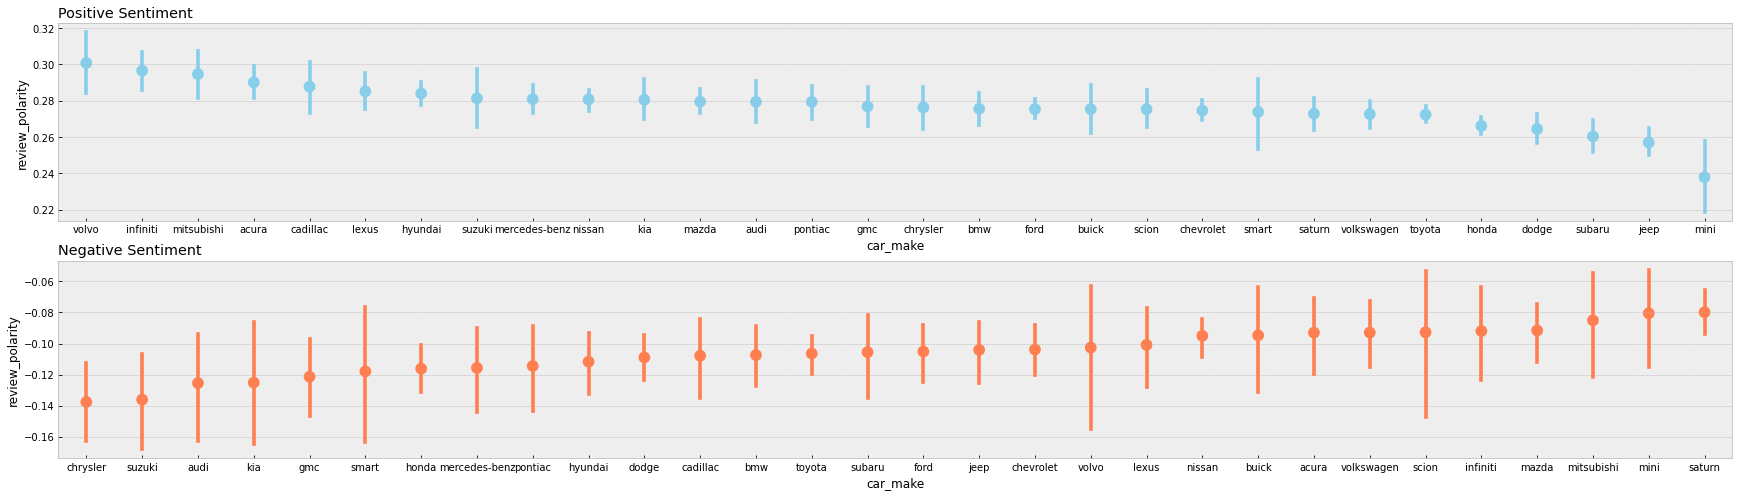

In [99]:
fig, ax = plt.subplots(2,1,figsize=(30,8))
pos_ord = df.query('pol_class =="positive"').groupby('car_make')['review_polarity'].mean().sort_values(ascending=False).index
neg_ord = df.query('pol_class =="negative"').groupby('car_make')['review_polarity'].mean().sort_values().index
sns.pointplot(x='car_make',y='review_polarity',data=df.query('pol_class == "positive"'), join=False, order=pos_ord, ax=ax[0], color='skyblue', estimator=np.mean)
ax[0].set_title('Positive Sentiment', loc='left')
sns.pointplot(x='car_make',y='review_polarity',data=df.query('pol_class == "negative"'), join=False, order=neg_ord, ax=ax[1], color='coral')
ax[1].set_title('Negative Sentiment', loc='left')
plt.show()

Overall chryler, suzuki and audi got the most negative sentiments while volvo, infiniti and mitsubishi got the most positive.

In [110]:
key_words = df[['comfort','power','problem','quiet','speed','noise','great', 'review_polarity']]

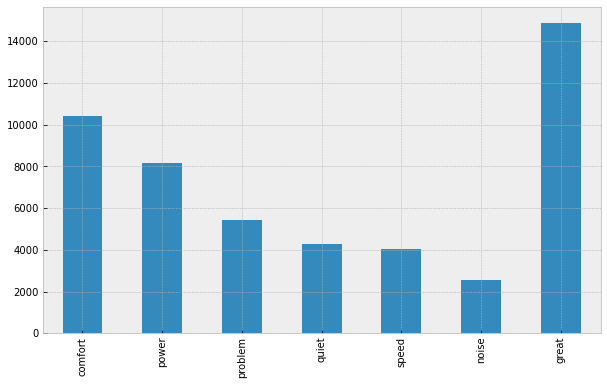

In [116]:
#Most common words mentions
key_words.sum().plot.bar(figsize=(10,6))